In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
htru2 = fetch_ucirepo(id=372) 
  
# data (as pandas dataframes) 
X = htru2.data.features 
y = htru2.data.targets 
  



In [2]:
X

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [3]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
17893,0
17894,0
17895,0
17896,0


In [4]:
y.value_counts()

class
0        16259
1         1639
Name: count, dtype: int64

## Knearest Neighbors

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
import seaborn as sns

### Data Transformation

In [6]:
df = pd.concat([X,y], axis = 1)
df

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [7]:
# Standard Scaling

columns_to_scale = df.columns[:-1]

standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])

# For Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[columns_to_scale] = minmax_scaler.fit_transform(df[columns_to_scale])


In [8]:
df_standard_scaled

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438,0
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581,0
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373,0
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300,0
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794,0
...,...,...,...,...,...,...,...,...,...
17893,0.988208,1.943284,-0.625655,-0.406697,-0.384010,-0.727295,1.586054,1.700034,0
17894,0.447319,0.429062,-0.328831,-0.234643,0.128776,0.939926,-1.189159,-0.906574,0
17895,0.321842,1.956220,-0.299334,-0.407492,0.299137,1.671568,-1.288079,-0.941330,0
17896,0.133628,1.074510,-0.260050,-0.291041,-0.361967,-0.664857,0.378257,0.275850,0


## Data Splitting

In [9]:
X_standard = df_standard_scaled.drop(columns={'class'})
y_standard = df_standard_scaled['class']

X_minmax = df_minmax_scaled.drop(columns={'class'})
y_minmax = df_minmax_scaled['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y_standard, test_size=0.3, random_state=0)

X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.3, random_state=0)


### Original Dataset


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# To store metrics
results = []

for k in range(5, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k, p=2)  
    knn_model.fit(X_train, y_train.values.ravel())
    y_pred = knn_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)  
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label = 1)

    results.append({
        'k': k,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

# Optional: print or convert to DataFrame for easy viewing
import pandas as pd
original_results_df = pd.DataFrame(results)


In [11]:
original_results_df

,k,accuracy,precision,recall,f1_score
0,5,0.973743,0.881612,0.788288,0.832342
1,6,0.975419,0.926230,0.763514,0.837037
2,7,0.973184,0.888601,0.772523,0.826506
3,8,0.974488,0.915989,0.761261,0.831488
4,9,0.973184,0.882653,0.779279,0.827751
5,10,0.974488,0.913747,0.763514,0.831902
6,11,0.974860,0.905512,0.777027,0.836364
7,12,0.975791,0.922043,0.772523,0.840686
8,13,0.975047,0.905759,0.779279,0.837772
9,14,0.975047,0.916667,0.768018,0.835784



 Best k (by f1_score): 12 with f1_score 0.8407
accuracy score is 0.9757914338919925
precision score is 0.9220430107526881
recall score is 0.7725225225225225
f1 score is 0.8406862745098039

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4926
           1       0.92      0.77      0.84       444

    accuracy                           0.98      5370
   macro avg       0.95      0.88      0.91      5370
weighted avg       0.98      0.98      0.97      5370



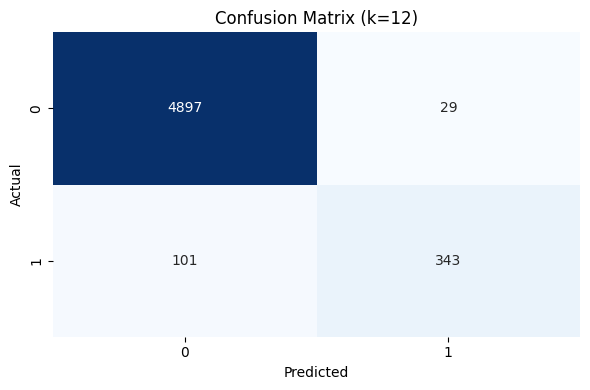

In [12]:
# Get the best k
best_k = original_results_df.loc[original_results_df['f1_score'].idxmax(), 'k']
best_f1 = original_results_df.loc[original_results_df['f1_score'].idxmax(), 'f1_score']
print(f"\n Best k (by f1_score): {int(best_k)} with f1_score {round(best_f1, 4)}")


# Train model with best k
best_knn = KNeighborsClassifier(n_neighbors=int(best_k), p=2)
best_knn.fit(X_train, y_train.values.ravel())
best_pred = best_knn.predict(X_test)

print(f'accuracy score is {accuracy_score(y_test, best_pred)}')
print(f'precision score is {precision_score(y_test, best_pred, pos_label = 1)}')
print(f'recall score is {recall_score(y_test, best_pred, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test, best_pred, pos_label = 1)}')

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, best_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix (k={int(best_k)})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### Standard Scaled Dataset


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# To store metrics
results = []

for k in range(5, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k, p=2)  
    knn_model.fit(X_train_standard, y_train_standard.values.ravel())
    y_pred = knn_model.predict(X_test_standard)

    acc = accuracy_score(y_test_standard, y_pred)
    prec = precision_score(y_test_standard, y_pred, pos_label=1)  
    rec = recall_score(y_test_standard, y_pred, pos_label=1)
    f1 = f1_score(y_test_standard, y_pred, pos_label = 1)

    results.append({
        'k': k,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

# Optional: print or convert to DataFrame for easy viewing
import pandas as pd
standard_results_df = pd.DataFrame(results)



In [14]:
standard_results_df

,k,accuracy,precision,recall,f1_score
0,5,0.979516,0.917500,0.826577,0.869668
1,6,0.979702,0.937337,0.808559,0.868198
2,7,0.979888,0.926396,0.822072,0.871122
3,8,0.979702,0.939633,0.806306,0.867879
4,9,0.979330,0.930233,0.810811,0.866426
5,10,0.978957,0.934383,0.801802,0.863030
6,11,0.978957,0.925450,0.810811,0.864346
7,12,0.979143,0.932292,0.806306,0.864734
8,13,0.978957,0.925450,0.810811,0.864346
9,14,0.978399,0.929319,0.799550,0.859564



 Best k (by f1_score): 7 with f1_score 0.8711
accuracy score is 0.9798882681564246
precision score is 0.9263959390862944
recall score is 0.8220720720720721
f1 score is 0.8711217183770883

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4926
           1       0.93      0.82      0.87       444

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



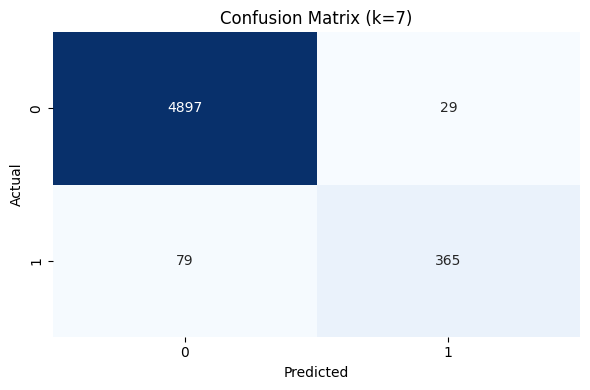

In [15]:
# Get the best k
best_k = standard_results_df.loc[standard_results_df['f1_score'].idxmax(), 'k']
best_f1 = standard_results_df.loc[standard_results_df['f1_score'].idxmax(), 'f1_score']
print(f"\n Best k (by f1_score): {int(best_k)} with f1_score {round(best_f1, 4)}")

# Train model with best k
best_knn = KNeighborsClassifier(n_neighbors=int(best_k), p=2)
best_knn.fit(X_train_standard, y_train_standard.values.ravel())
best_pred = best_knn.predict(X_test_standard)

print(f'accuracy score is {accuracy_score(y_test_standard, best_pred)}')
print(f'precision score is {precision_score(y_test_standard, best_pred, pos_label = 1)}')
print(f'recall score is {recall_score(y_test_standard, best_pred, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test_standard, best_pred, pos_label = 1)}')

# Classification report
print("\n Classification Report:")
print(classification_report(y_test_standard, best_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_standard, best_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix (k={int(best_k)})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### Minmax Scaled Dataset


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# To store metrics
results = []

for k in range(5, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k, p=2)  
    knn_model.fit(X_train_minmax, y_train_minmax.values.ravel())
    y_pred = knn_model.predict(X_test_minmax)

    acc = accuracy_score(y_test_minmax, y_pred)
    prec = precision_score(y_test_minmax, y_pred, pos_label=1)  
    rec = recall_score(y_test_minmax, y_pred, pos_label=1)
    f1 = f1_score(y_test_minmax, y_pred, pos_label = 1)

    results.append({
        'k': k,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

# Optional: print or convert to DataFrame for easy viewing
import pandas as pd
minmax_results_df = pd.DataFrame(results)



In [17]:
minmax_results_df

,k,accuracy,precision,recall,f1_score
0,5,0.980074,0.916049,0.835586,0.873969
1,6,0.979888,0.937500,0.810811,0.869565
2,7,0.979330,0.913151,0.828829,0.868949
3,8,0.980074,0.939948,0.810811,0.870617
4,9,0.979888,0.928571,0.819820,0.870813
5,10,0.978771,0.931937,0.801802,0.861985
6,11,0.978771,0.925258,0.808559,0.862981
7,12,0.979516,0.944149,0.799550,0.865854
8,13,0.979143,0.934555,0.804054,0.864407
9,14,0.978585,0.936340,0.795045,0.859927



 Best k (by f1_score): 5 with f1_score 0.874
accuracy score is 0.9800744878957169
precision score is 0.9160493827160494
recall score is 0.8355855855855856
f1 score is 0.8739693757361602

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.92      0.84      0.87       444

    accuracy                           0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



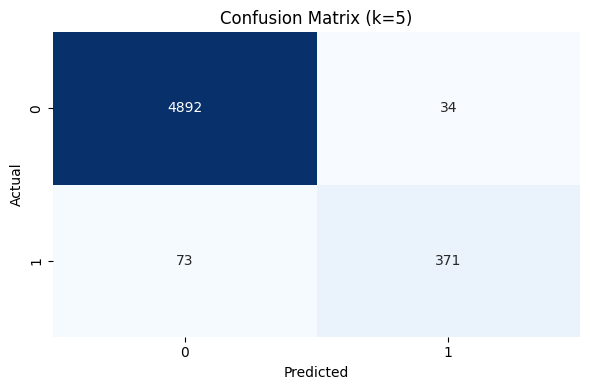

In [18]:
# Get the best k
best_k = minmax_results_df.loc[minmax_results_df['f1_score'].idxmax(), 'k']
best_f1 = minmax_results_df.loc[minmax_results_df['f1_score'].idxmax(), 'f1_score']
print(f"\n Best k (by f1_score): {int(best_k)} with f1_score {round(best_f1, 4)}")

# Train model with best k
best_knn = KNeighborsClassifier(n_neighbors=int(best_k), p=2)
best_knn.fit(X_train_minmax, y_train_minmax.values.ravel())
best_pred = best_knn.predict(X_test_minmax)

print(f'accuracy score is {accuracy_score(y_test_minmax, best_pred)}')
print(f'precision score is {precision_score(y_test_minmax, best_pred, pos_label = 1)}')
print(f'recall score is {recall_score(y_test_minmax, best_pred, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test_minmax, best_pred, pos_label = 1)}')

# Classification report
print("\n Classification Report:")
print(classification_report(y_test_minmax, best_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_minmax, best_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix (k={int(best_k)})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()